<a href="https://colab.research.google.com/github/bomiiisong/AI_Project/blob/master/Modeling/VGG16(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1차 모델링 with VGG16 and GPU

* dataset : img_final
    * best(label 1) : 269
    * Worst(label 0) : 275

* HyperParameter
    * optimizer : RMSprop
    * BatchNormalization
    * Dropout(0.5)
    * epoch : 50
    * Trainable Layer : block5_conv1

## 1. Set Data and Modeling Environment 

> ### 1) Import packages

In [5]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers

* Check Tensorflow version

In [6]:
tensorflow.__version__

'2.4.1'

* Check Keras version

In [7]:
keras.__version__

'2.4.3'

> ### 2) Data Load

* Drive Mount


In [8]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* unzip Data

In [ ]:
!unzip /content/drive/My\ Drive/AI_team3/dataset_final/img_final.zip

## 2. Data Preprocessing

* Apply Image Generator (Normalization, set batch size and class mode)


In [12]:
image_dir = 'img'

In [13]:
random_seed = 414

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(image_dir,target_size = (640, 640), seed=random_seed,
                                                    batch_size = 10, class_mode = 'binary', subset='training')

valid_generator = datagen.flow_from_directory(image_dir, target_size=(640, 640), seed=random_seed,
                                              batch_size=10, class_mode='binary', subset='validation')

Found 382 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


## 3. Modeling

> ### 1) Define VGG16 

In [19]:
from keras.applications import VGG16

base = VGG16(weights = 'imagenet', include_top = False, input_shape = (640, 640, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [20]:
base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 640, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 160, 160, 128)     0     

> ### 2) Training Layer Freezing


In [21]:
set_trainable = False

for layer in base.layers:
  if layer.name == 'block5_conv1':       
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [22]:
base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 640, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 640, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 640, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 320, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 320, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 320, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 160, 160, 128)     0     

> ### 3) Define DNN Layer

In [23]:
model_1 = models.Sequential()
model_1.add(base)

model_1.add(layers.Flatten())

model_1.add(layers.Dense(256, activation = 'relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model_2 = models.Sequential()
model_2.add(base)

model_2.add(layers.Flatten())

model_2.add(layers.Dense(512, activation = 'relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(256, activation = 'relu'))
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(2, activation = 'softmax'))   

In [ ]:
model_3 = models.Sequential()
model_3.add(base)

model_3.add(layers.Flatten())

model_3.add(layers.Dense(256, activation = 'relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(2, activation = 'softmax'))  

In [ ]:
model_4 = models.Sequential()
model_4.add(base)

model_4.add(layers.Flatten())

model_4.add(layers.Dense(512, activation = 'relu'))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(256))
model_4.add(layers.Dropout(0.2))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Activation('relu'))
model_4.add(layers.Dense(2, activation = 'softmax'))   

> ### 4) Model Compile

In [26]:
model_1.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 0.000005),
              metrics=['accuracy'])

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

> ### 5) Model Train

In [27]:
hist_1 = model_1.fit(train_generator, 
                 steps_per_epoch = train_generator.samples // train_generator.batch_size, 
                 epochs = 50, 
                 validation_data = valid_generator,
                 validation_steps=valid_generator.samples // valid_generator.batch_size)

Epoch 1/50
38/38 [==============================] - 72s 730ms/step - loss: 0.7192 - accuracy: 0.5855 - val_loss: 0.5008 - val_accuracy: 0.7375
Epoch 2/50
38/38 [==============================] - 24s 626ms/step - loss: 0.3018 - accuracy: 0.8915 - val_loss: 0.5072 - val_accuracy: 0.7500
Epoch 3/50
38/38 [==============================] - 24s 641ms/step - loss: 0.1836 - accuracy: 0.9444 - val_loss: 0.3476 - val_accuracy: 0.8250
Epoch 4/50
38/38 [==============================] - 25s 661ms/step - loss: 0.0988 - accuracy: 0.9757 - val_loss: 0.3616 - val_accuracy: 0.8188
Epoch 5/50
38/38 [==============================] - 25s 649ms/step - loss: 0.0635 - accuracy: 0.9836 - val_loss: 0.4587 - val_accuracy: 0.8250
Epoch 6/50
38/38 [==============================] - 25s 647ms/step - loss: 0.0445 - accuracy: 0.9916 - val_loss: 0.5442 - val_accuracy: 0.8188
Epoch 7/50
38/38 [==============================] - 25s 649ms/step - loss: 0.0191 - accuracy: 0.9991 - val_loss: 0.4046 - val_accuracy: 0.8062

In [ ]:
%%time

hist_2 = model_2.fit(train_generator, 
                 steps_per_epoch = train_generator.samples // train_generator.batch_size, 
                 epochs = 50, 
                 validation_data = valid_generator,
                 validation_steps=valid_generator.samples // valid_generator.batch_size)

In [ ]:
%%time

hist_3 = model_3.fit(train_generator, 
                 steps_per_epoch = train_generator.samples // train_generator.batch_size, 
                 epochs = 50, 
                 validation_data = valid_generator,
                 validation_steps=valid_generator.samples // valid_generator.batch_size)

In [ ]:
%%time

hist_4 = model_4.fit(train_generator, 
                 steps_per_epoch = train_generator.samples // train_generator.batch_size, 
                 epochs = 50, 
                 validation_data = valid_generator,
                 validation_steps=valid_generator.samples // valid_generator.batch_size)

## 4. Evaluate Model

* Loss and Accuracy visualization

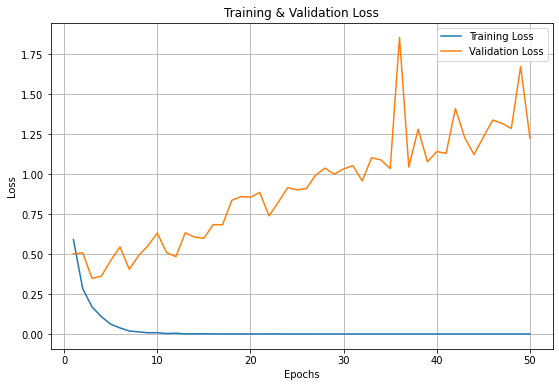

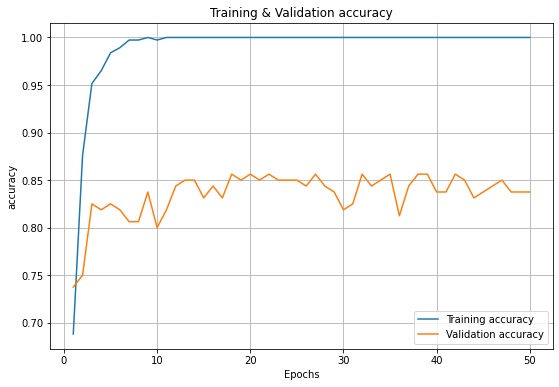

In [29]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_1.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_1.history['loss'])
plt.plot(epochs, hist_1.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_1.history['accuracy'])
plt.plot(epochs, hist_1.history['val_accuracy'])

plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

* Loss and Accuracy evaluate

In [31]:
loss_1, accuracy_1 = model_1.evaluate(valid_generator)
print(f'Loss : {loss_1:.5f}')
print(f'Accuracy : {accuracy_1:.5f}')

17/17 [==============================] - 6s 359ms/step - loss: 1.2407 - accuracy: 0.8333
Loss : 1.24070
Accuracy : 0.83333
